# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

Here, we'll review and analyze the same data Dr. Semmelweis collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. Here you can find scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).


### Import Statements

In [59]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

### Notebook Presentation

In [60]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [61]:
df_yearly = pd.read_csv('data/annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('../data/monthly_deaths.csv', 
                      parse_dates=['date'])


# Preliminary Data Exploration

* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

### Yearly Dataframe top level look

In [62]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Yearly Dataframe shape

In [63]:
df_yearly.shape

(12, 4)

### Monthly Dataframe top level look

In [64]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Monthly Dataframe shape

In [65]:
df_monthly.shape

(98, 3)

### Sample look at both dataframes

In [66]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [67]:
df_monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


### Checking for NaN Values and Duplicates on both dataframes

In [68]:
df_yearly.isna().values.sum()

0

In [69]:
df_yearly.duplicated().values.sum()

0

In [70]:
df_monthly.isna().values.sum()

0

In [71]:
df_monthly.duplicated().values.sum()

0

### Descriptive Statistics

In [72]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

Taking a look at how dangerous childbirth was in the 1840s in Vienna 

In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

### Checking Maternal Death Rates for 1841 as a year specifically

In [73]:
births_1841 = df_yearly[df_yearly['year']== 1841]['births'].sum()
births_1841

5478

In [74]:
deaths_1841 = df_yearly[df_yearly['year']== 1841]['deaths'].sum()
deaths_1841

323

In [109]:
f"Chances of dying from childbirth in 1841 in Vienna: {round((deaths_1841/births_1841)*100, 3)}%"

'Chances of dying from childbirth in 1841 in Vienna: 5.896%'

### Checking Maternal Death Rates for 1841-1849

In [108]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying from childbirth in the 1840s in Vienna: {prob:.3}%')

Chances of dying from childbirth in the 1840s in Vienna: 7.08%


# Visualizing the Total Number of Births and Deaths over time

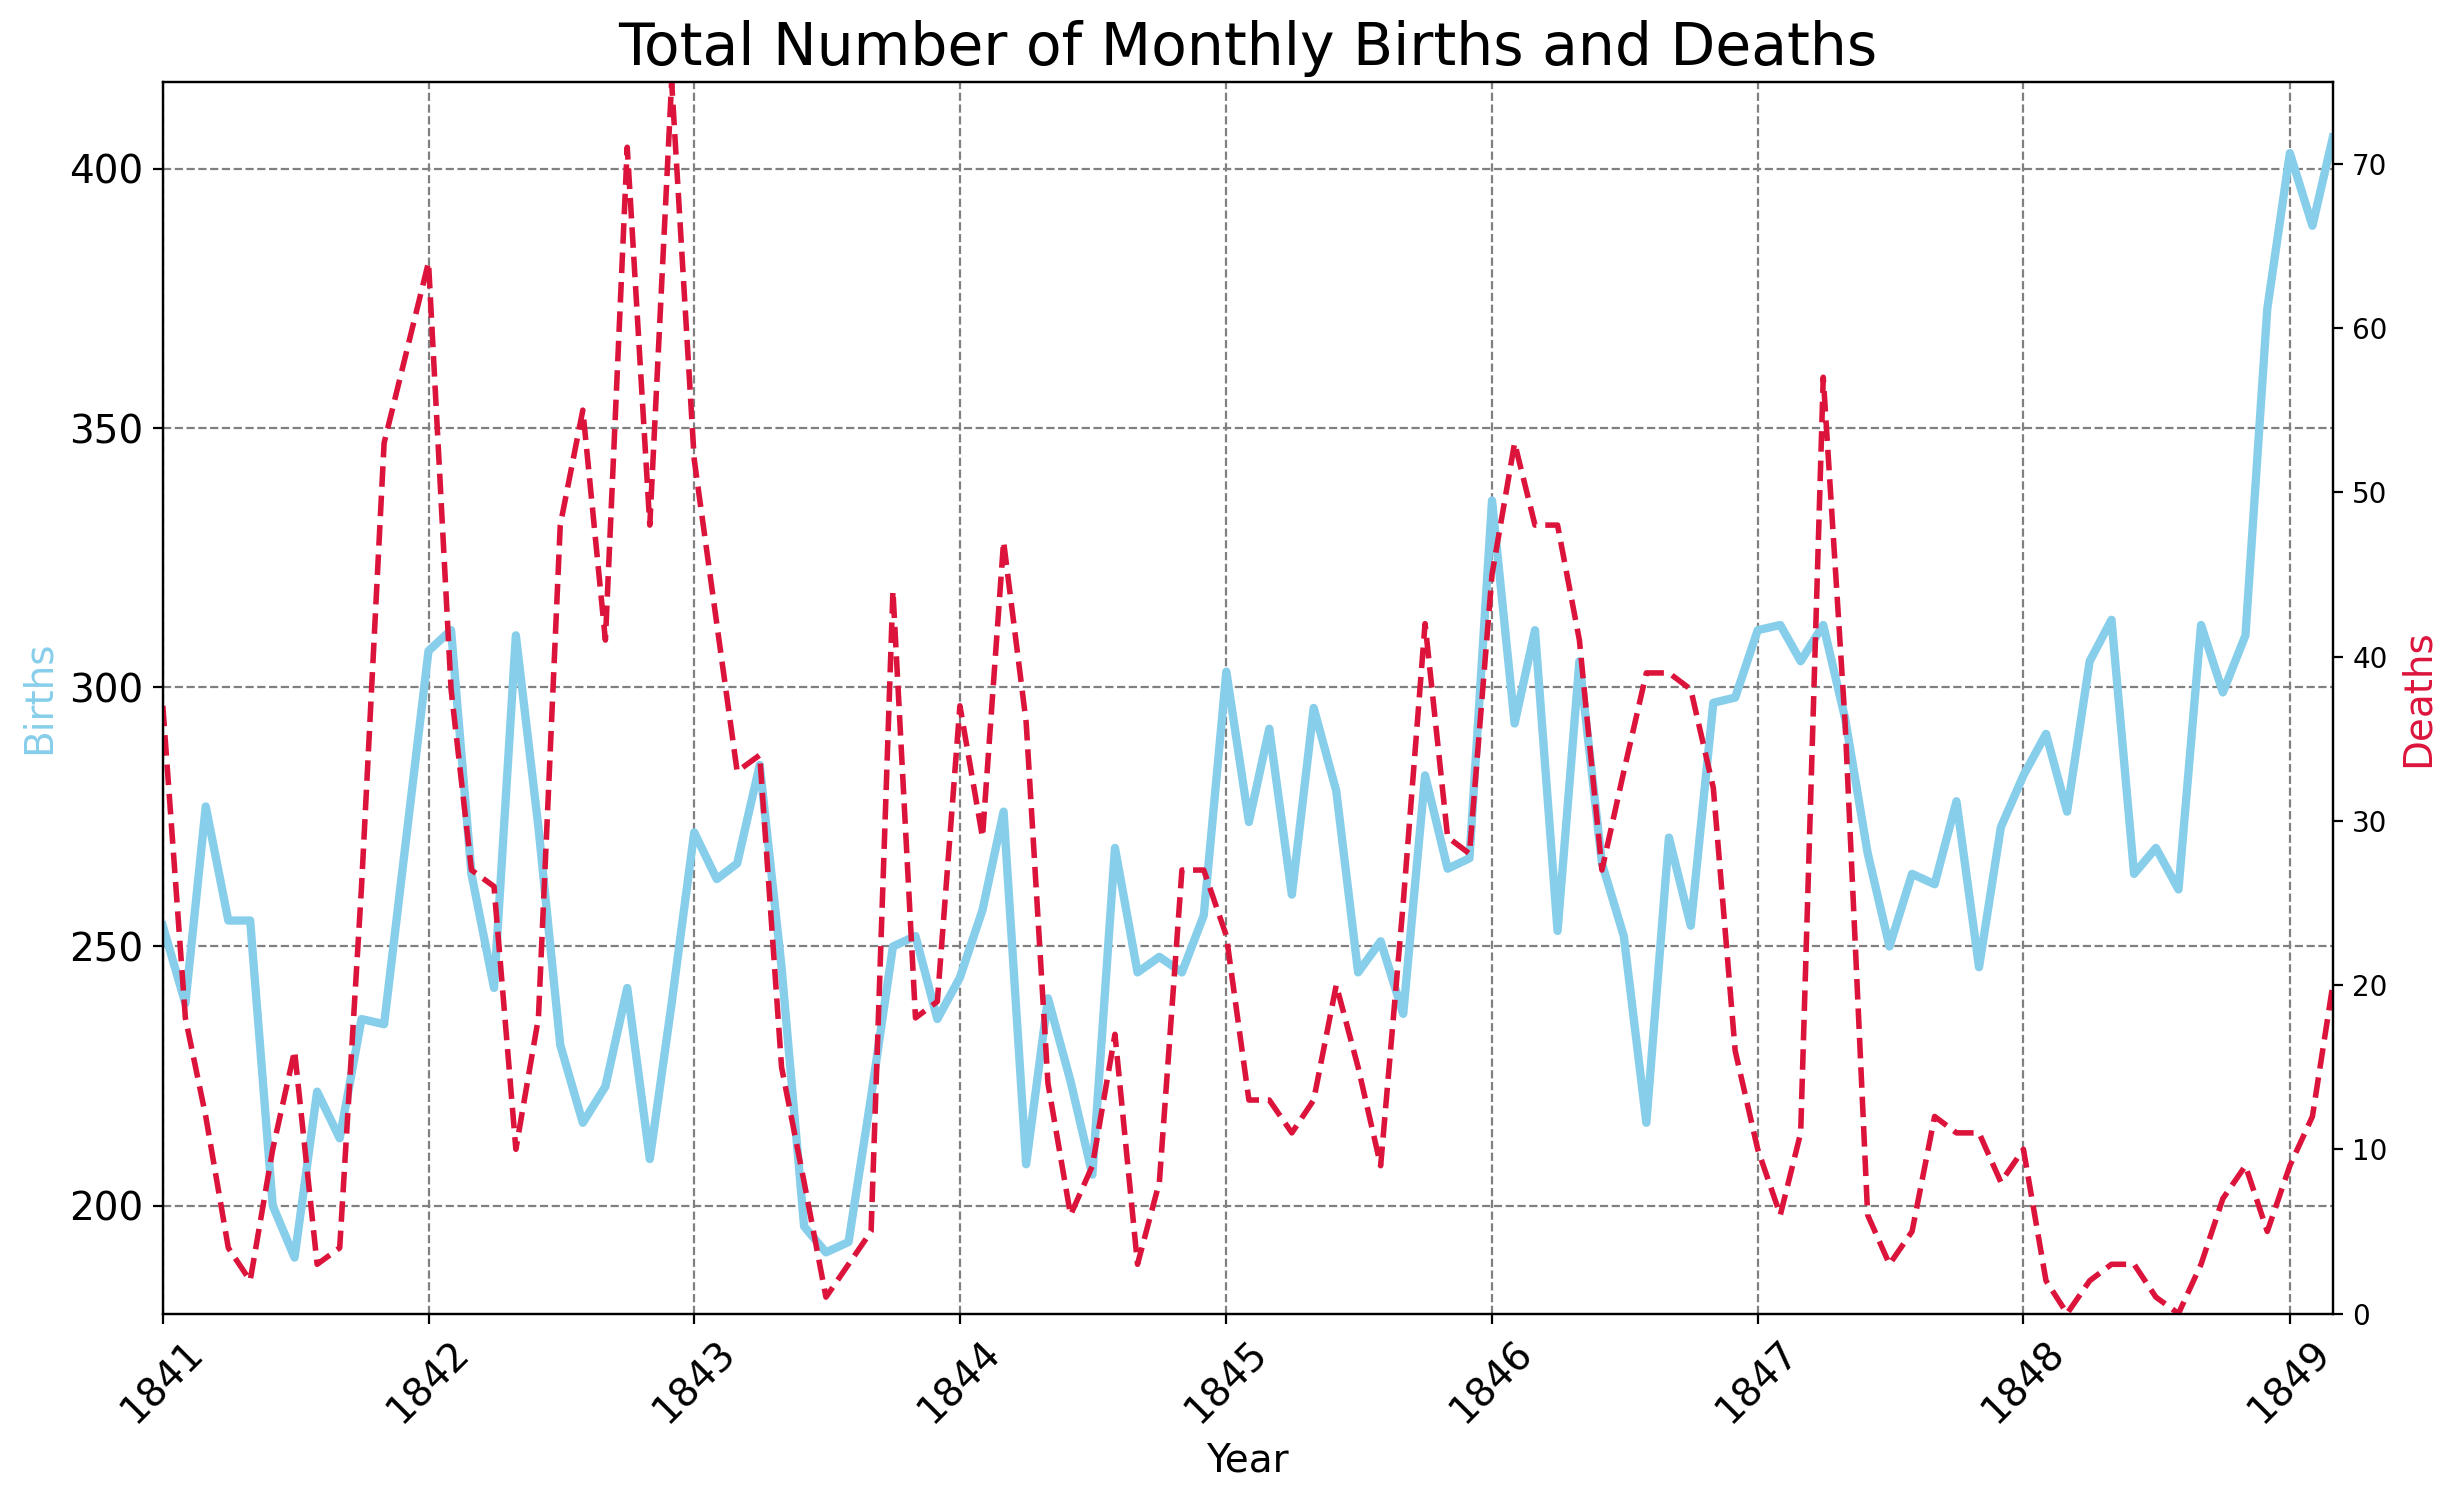

In [77]:
plt.figure(figsize=(14,8), dpi=200)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Total Number of Monthly Births and Deaths', fontsize=21)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.set_ylabel('Births', color='skyblue', fontsize=14)
ax1.set_xlim(df_monthly['date'].min(), df_monthly['date'].max())
ax1.set_xlabel('Year', color='black', fontsize=14)
ax2.set_ylim([0, df_monthly['deaths'].max()])
ax2.set_ylabel('Deaths', color='crimson', fontsize=14)

ax1.plot(df_monthly['date'], df_monthly['births'], color='skyblue', linewidth=3)
ax2.plot(df_monthly['date'], df_monthly['deaths'], color='crimson', linewidth=2, linestyle='--')

plt.show()

# The Yearly Data Split by Clinic

Using Plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 

* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

### Reviewing Clinic 1

In [78]:
df_clinic = df_yearly.groupby(['clinic', 'year'], as_index=False).sum()
df_clinic_1 = df_clinic[df_clinic['clinic']=='clinic 1']
df_clinic_1

,clinic,year,births,deaths
0,clinic 1,1841,3036,237
1,clinic 1,1842,3287,518
2,clinic 1,1843,3060,274
3,clinic 1,1844,3157,260
4,clinic 1,1845,3492,241
5,clinic 1,1846,4010,459


### Reviewing Clinic 2

In [79]:
df_clinic_2 = df_clinic[df_clinic['clinic']=='clinic 2']
df_clinic_2

,clinic,year,births,deaths
6,clinic 2,1841,2442,86
7,clinic 2,1842,2659,202
8,clinic 2,1843,2739,164
9,clinic 2,1844,2956,68
10,clinic 2,1845,3241,66
11,clinic 2,1846,3754,105


### Plotly Line Chart - Total Yearly Births by Clinic

In [80]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

### Plotly Line Chart - Total Yearly Births by Clinic

In [81]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

### Calculating the Proportion of Deaths at Each Clinic

* Calculating the average maternal death rate for clinic 1 and clinic 2
* Creating another plotly line chart to show how the percentage varies year over year with the two different clinics
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [82]:
df_yearly['pct_deaths'] = df_yearly['deaths']/df_yearly['births']
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


### Clinic 1 Review

In [83]:
df_yearly[df_yearly['clinic']=='clinic 1'].describe()

,year,births,deaths,pct_deaths
count,6.00,6.00,6.00,6.00
mean,"1,843.50","3,340.33",331.50,0.10
std,1.87,368.54,123.76,0.03
min,"1,841.00","3,036.00",237.00,0.07
25%,"1,842.25","3,084.25",245.75,0.08
50%,"1,843.50","3,222.00",267.00,0.09
75%,"1,844.75","3,440.75",412.75,0.11
max,"1,846.00","4,010.00",518.00,0.16


### Clinic 2 Review

In [84]:
df_yearly[df_yearly['clinic']=='clinic 2'].describe()

,year,births,deaths,pct_deaths
count,6.00,6.00,6.00,6.00
mean,"1,843.50","2,965.17",115.17,0.04
std,1.87,472.66,55.72,0.02
min,"1,841.00","2,442.00",66.00,0.02
25%,"1,842.25","2,679.00",72.50,0.02
50%,"1,843.50","2,847.50",95.50,0.03
75%,"1,844.75","3,169.75",149.25,0.05
max,"1,846.00","3,754.00",202.00,0.08


### Plotting the Proportion of Yearly Deaths by Clinic

In [85]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Total Maternal Mortality Percentage by Clinic')
 
line.show()

### Alternative method

In [86]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [87]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [88]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

* Adding a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Creating two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculating the average death rate prior to June 1947.
* Calculating the average death rate after June 1947.

In [89]:
df_monthly['pct_deaths'] = df_monthly['deaths']/df_monthly['births']
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
93,1848-11-01,310,9,0.03
94,1848-12-01,373,5,0.01
95,1849-01-01,403,9,0.02
96,1849-02-01,389,12,0.03


In [90]:
df_monthly_before = df_monthly[df_monthly['date']< handwashing_start]
df_monthly_before

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
71,1847-01-01,311,10,0.03
72,1847-02-01,312,6,0.02
73,1847-03-01,305,11,0.04
74,1847-04-01,312,57,0.18


In [91]:
df_monthly_after = df_monthly[df_monthly['date']>= handwashing_start]
df_monthly_after

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,0.02
77,1847-07-01,250,3,0.01
78,1847-08-01,264,5,0.02
79,1847-09-01,262,12,0.05
80,1847-10-01,278,11,0.04
81,1847-11-01,246,11,0.04
82,1847-12-01,273,8,0.03
83,1848-01-01,283,10,0.04
84,1848-02-01,291,2,0.01
85,1848-03-01,276,0,0.00


In [92]:
f"The average monthly death rate before handwashing was: {df_monthly_before['pct_deaths'].mean()*100: .5}%"

'The average monthly death rate before handwashing was:  10.505%'

In [93]:
f"The average monthly death rate after handwashing was: {df_monthly_after['pct_deaths'].mean()*100: .4}%"

'The average monthly death rate after handwashing was:  2.109%'

### Calculating a Rolling Average of the Death Rate

In [94]:
df_monthly_before.index = df_monthly_before['date']
df_before_rolling = df_monthly_before.rolling(6).mean()
df_before_rolling

C:\Users\armed\AppData\Local\Temp\ipykernel_29920\2799412423.py:2: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')



,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,0.11
1847-02-01,290.50,23.50,0.08
1847-03-01,296.17,18.83,0.07


# Matplotlib Line Chart

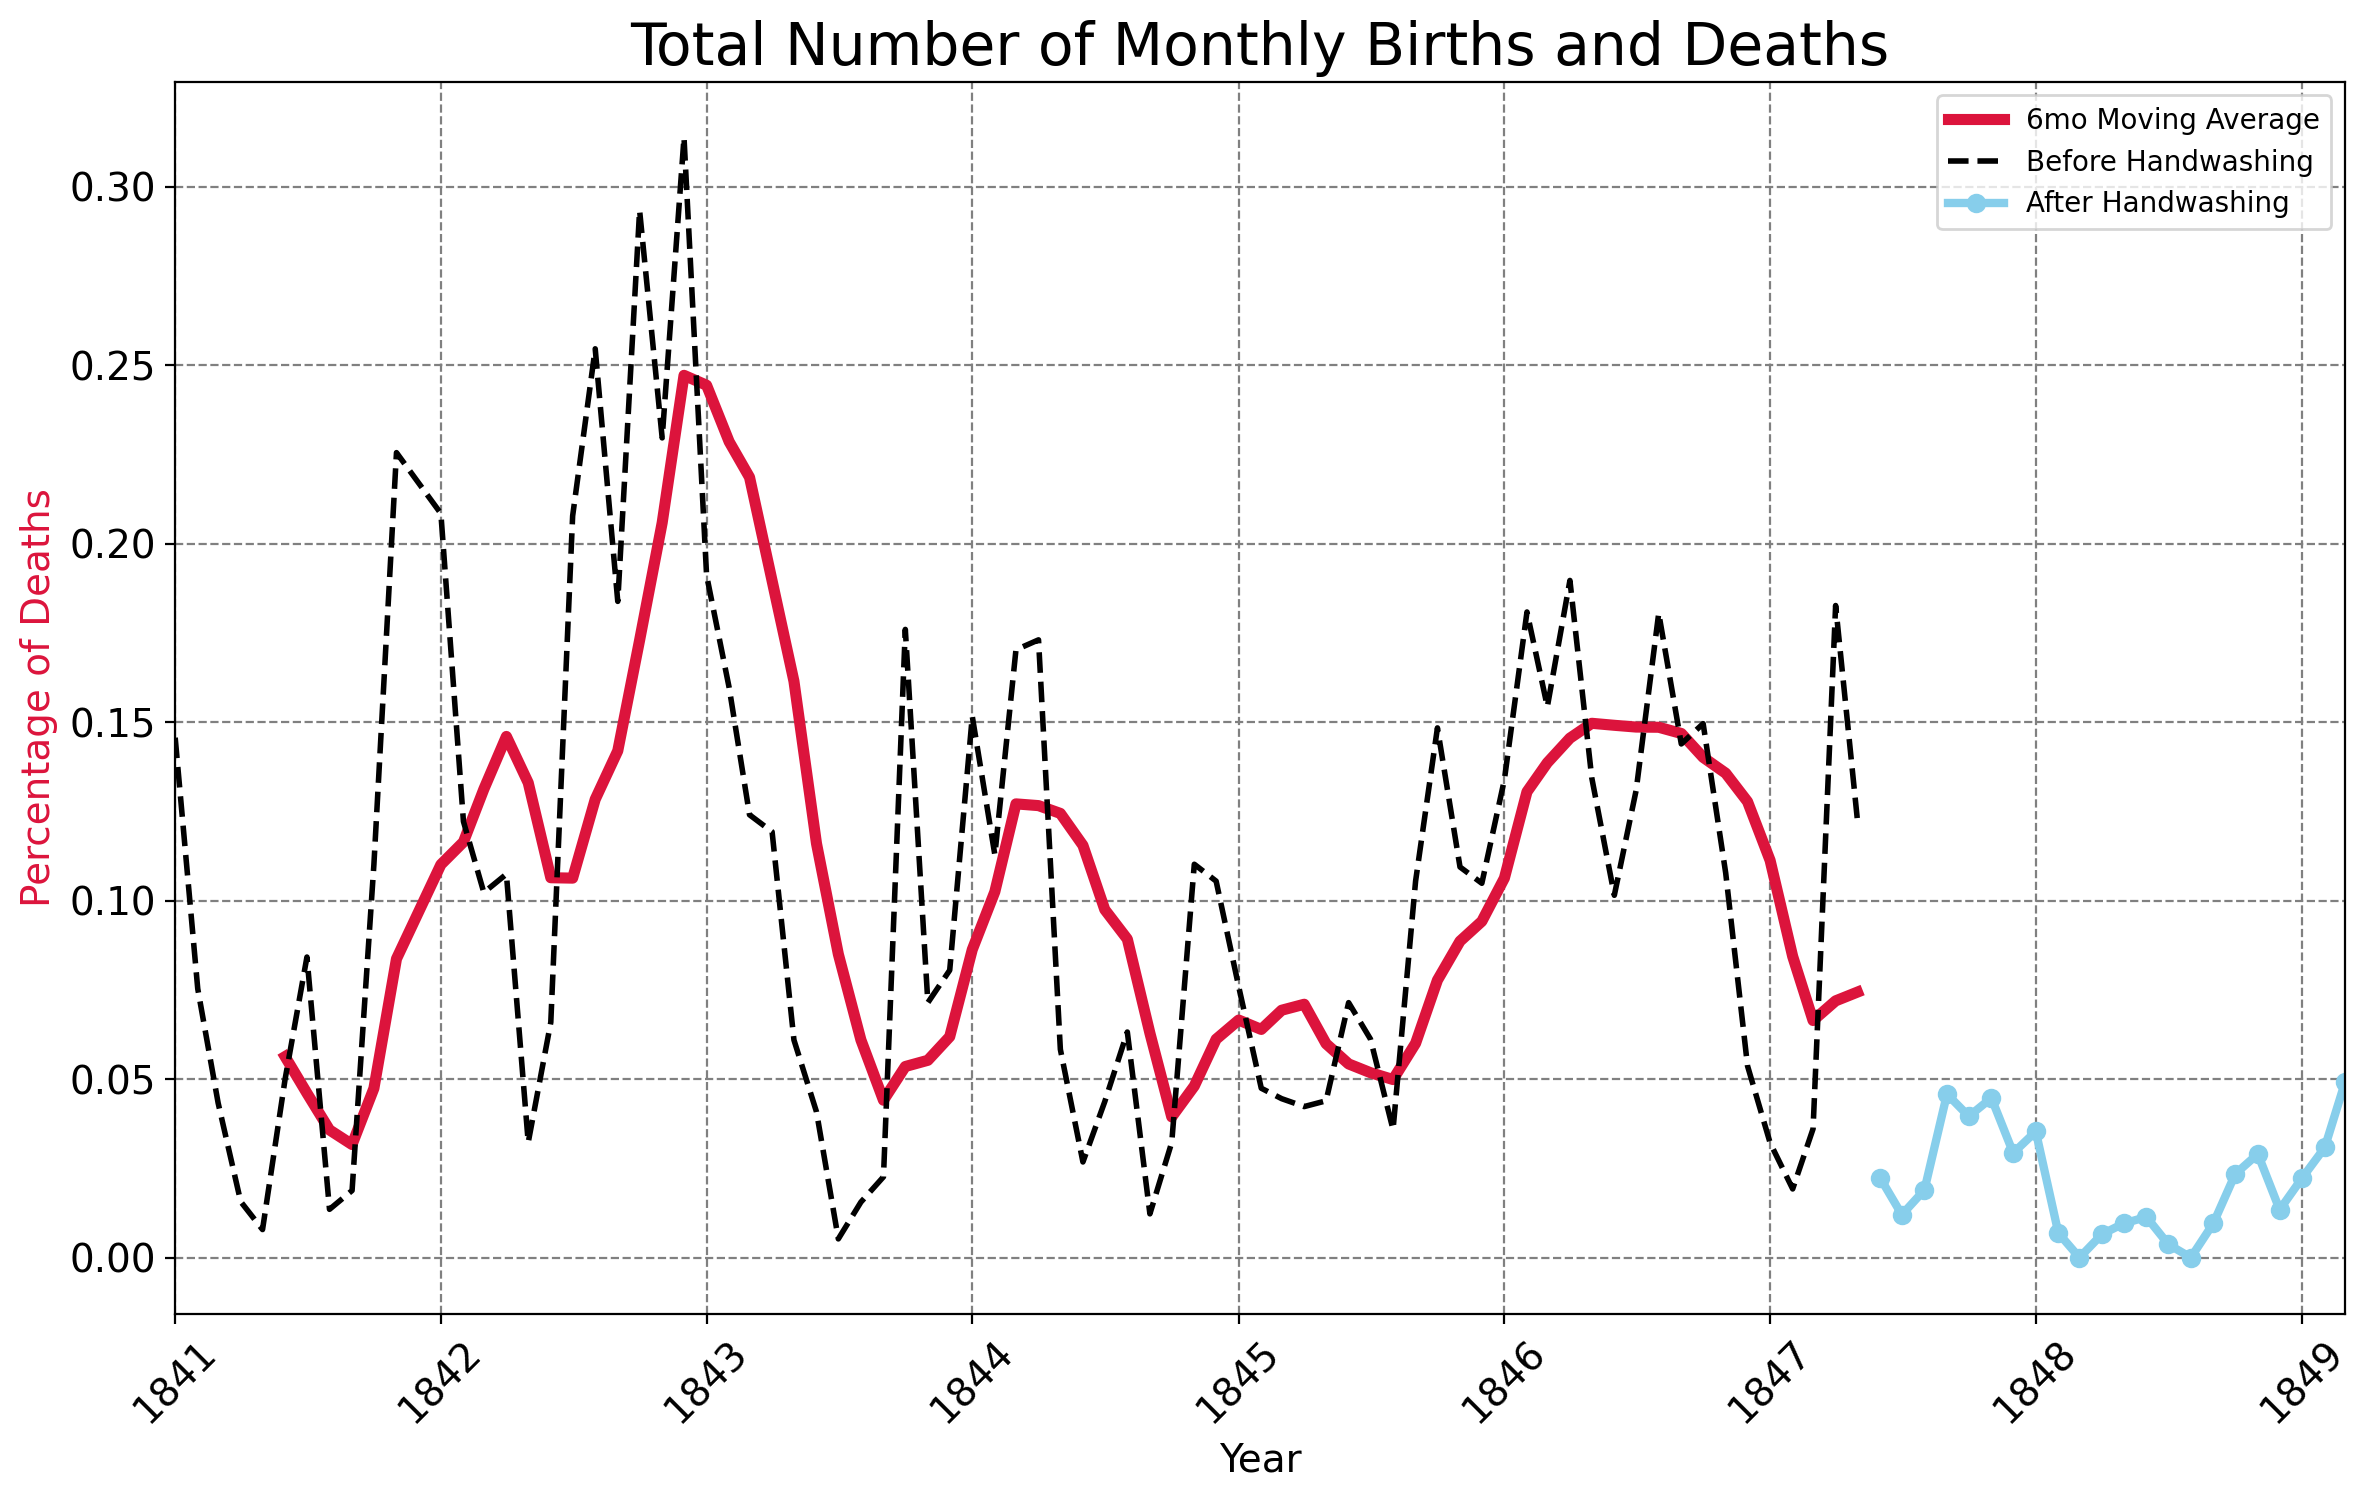

In [95]:
plt.figure(figsize=(14,8), dpi=200)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Total Number of Monthly Births and Deaths', fontsize=21)

ax1 = plt.gca()
# ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.set_ylabel('Percentage of Deaths', color='crimson', fontsize=14)
ax1.set_xlim(df_monthly['date'].min(), df_monthly['date'].max())
ax1.set_xlabel('Year', color='black', fontsize=14)
# ax2.set_ylim([0, df_monthly['deaths'].max()])
# ax2.set_ylabel('Deaths', color='crimson', fontsize=14)

ax1.plot(df_before_rolling.index, df_before_rolling['pct_deaths'], color='crimson', linewidth=4, label='6mo Moving Average')
# ax2.plot(df_monthly['date'], df_monthly['deaths'], color='crimson', linewidth=2, linestyle='--')
ax1.plot(df_monthly_before['date'], df_monthly_before['pct_deaths'], color='black', linewidth=2, linestyle='--', label='Before Handwashing')
ax1.plot(df_monthly_after['date'], df_monthly_after['pct_deaths'], color='skyblue', linewidth=3, marker='o', label='After Handwashing')
ax1.legend()

plt.show()

# Statistics - Calculating the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

### Average percentage of monthly deaths before handwashing

In [96]:
before_avg = df_monthly_before['pct_deaths'].mean()
f"{(round(before_avg, 4))*100}%"

'10.5%'

### Average percentage of monthly deaths after handwashing

In [97]:
after_avg = df_monthly_after['pct_deaths'].mean()
f"{(round(after_avg, 4))*100}%"

'2.11%'

### Percentage difference between before and after

In [98]:
difference_avg = before_avg - after_avg
f"{(round(difference_avg, 4))*100}%"

'8.4%'

### How many times lower are chances of dying after handwashing

In [99]:
chances_avg = before_avg/after_avg
f"{round(chances_avg, 3)} times lowered chances"

'4.98 times lowered chances'

### Using Box Plots to Illustrate How the Death Rate Changed Before and After Handwashing
 
* Using Numpy's where function to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing 
* Next, using plotly to create box plot of the data before and after handwashing. 
* Reviewing how key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of handwashing

In [100]:
new_col = np.where(df_monthly['date']<handwashing_start, 'before', 'after')
new_col

array(['before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'after', 'after', 'after',
       'after', 'after', 'after', 'after', 'after', 'after', 'after',
       'after', 'after', 'after', 'after', 'after', 

In [101]:
df_monthly['handwashing'] = new_col
df_monthly

,date,births,deaths,pct_deaths,handwashing
0,1841-01-01,254,37,0.15,before
1,1841-02-01,239,18,0.08,before
2,1841-03-01,277,12,0.04,before
3,1841-04-01,255,4,0.02,before
4,1841-05-01,255,2,0.01,before
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,after
94,1848-12-01,373,5,0.01,after
95,1849-01-01,403,9,0.02,after
96,1849-02-01,389,12,0.03,after


In [102]:
box = px.box(df_monthly,
             y='pct_deaths',
             x='handwashing',
             color='handwashing',
             title='Death Rate Before vs. After Handwashing')
 
box.show()

### Using Histograms to Visualize the Monthly Distribution of Outcomes

Creating a Plotly histogram to show the monthly percentage of deaths. 

In [103]:
hist = px.histogram(df_monthly,
                   x='pct_deaths',
                   color='handwashing',
                   opacity=0.5,
                   nbins=30,
                    barmode='overlay',
                   histnorm='percent',
                   marginal='box')
hist.show()

### Kernel Density Estimate (KDE) to visualise a smooth distribution

Using KDE plot with Seaborn to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after

### Before clipping

<Axes: xlabel='pct_deaths', ylabel='Density'>

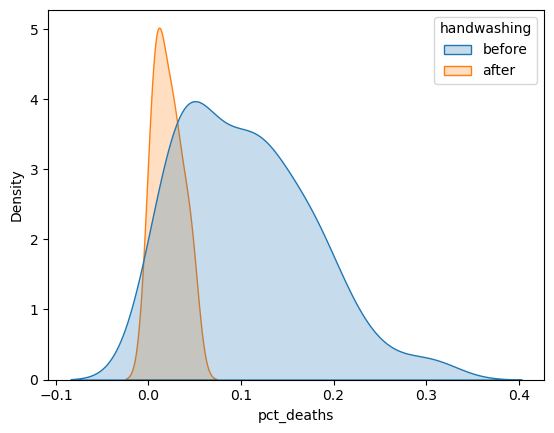

In [104]:
#failed attempt
kde_plot = sns.kdeplot(df_monthly,
                      x='pct_deaths',
                      fill='handwashing',
                      hue='handwashing',
                      thresh=0)
kde_plot

### Adjusted with the clip parameter

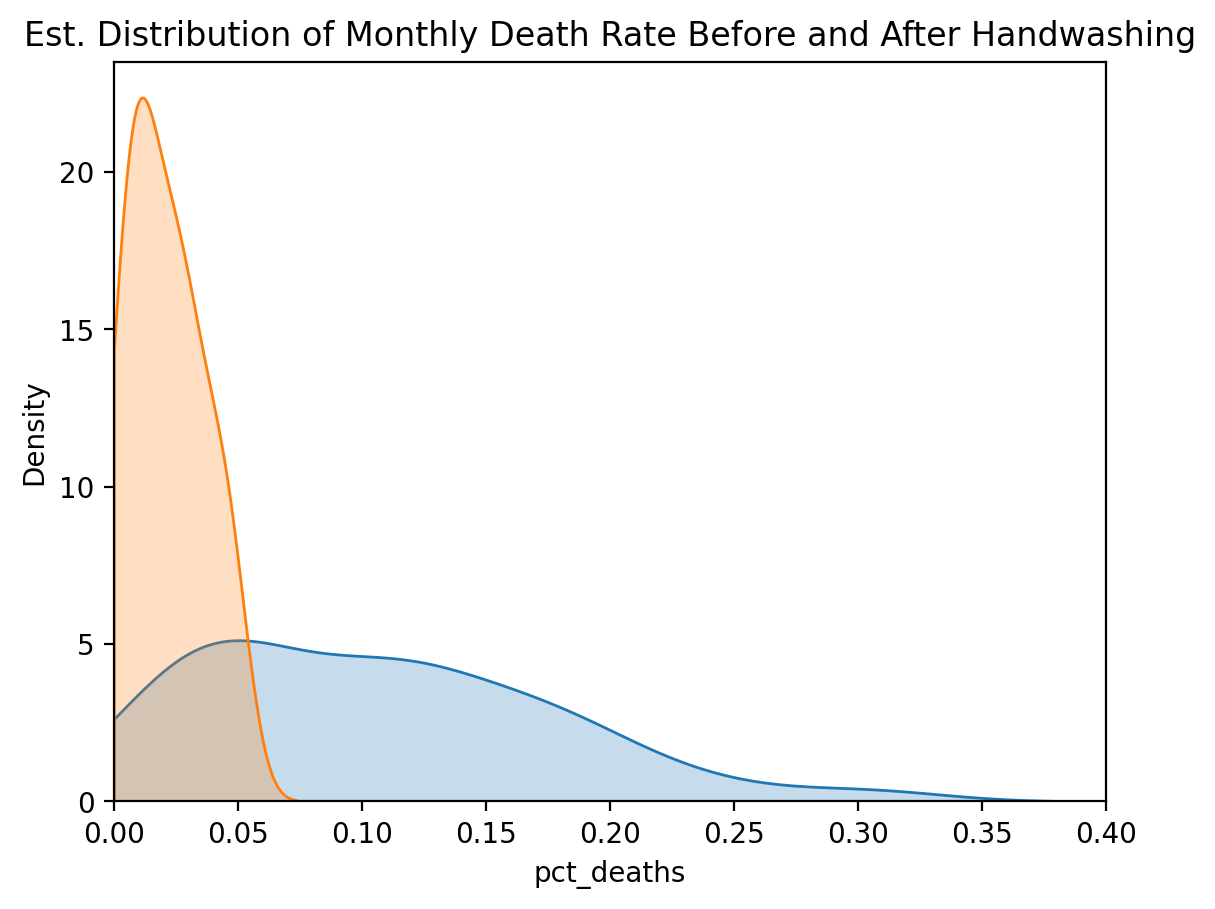

In [105]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate. Needs clipped at 0
sns.kdeplot(df_monthly_before['pct_deaths'], fill=True, clip=(0,1))
sns.kdeplot(df_monthly_after['pct_deaths'], fill=True, clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

### Using a T-Test to Show Statistical Significance

In [106]:
t_stat, p_value = stats.ttest_ind(a=df_monthly_before['pct_deaths'],
                                 b=df_monthly_after['pct_deaths'])
print(f'p-value is {p_value: .10f}')
f't-statistic is {t_stat: .4}'

p-value is  0.0000002985


't-statistic is  5.512'